In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
#Read

yearly_df = pd.read_csv('yearly_deaths_by_clinic.csv')
yearly_df

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [46]:
yearly_df.shape

(12, 4)

In [47]:
yearly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [48]:
#Compare clinics

yearly_df.groupby('clinic')['deaths'].sum()

clinic
clinic 1    1989
clinic 2     691
Name: deaths, dtype: int64

In [49]:
#mortality

yearly_df['mortality'] = yearly_df.deaths/ yearly_df.births
yearly_df

,year,births,deaths,clinic,mortality
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [50]:
clinic_1 = yearly_df[yearly_df['clinic']=='clinic 1']
clinic_2 = yearly_df[yearly_df['clinic']=='clinic 2']

In [51]:
clinic_1

,year,births,deaths,clinic,mortality
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [52]:
clinic_2

,year,births,deaths,clinic,mortality
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


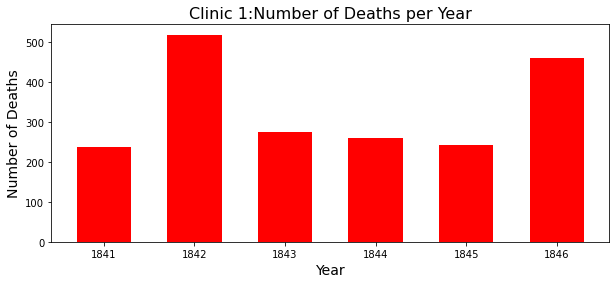

In [53]:
#Visualize number of deaths clininc 1

fig, ax = plt.subplots(figsize=(10,4))
plt.bar(clinic_1.year,clinic_1.deaths,width=0.6,color='red')
plt.title('Clinic 1:Number of Deaths per Year',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Number of Deaths',fontsize=14)
plt.show()

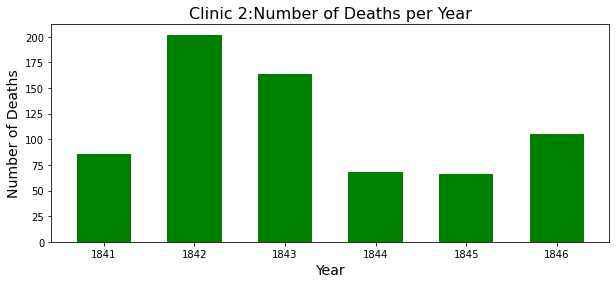

In [54]:
#Visualize number of deaths clininc 2

fig, ax = plt.subplots(figsize=(10,4))
plt.bar(clinic_2.year,clinic_2.deaths,width=0.6,color='green')
plt.title('Clinic 2:Number of Deaths per Year',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Number of Deaths',fontsize=14)
plt.show()

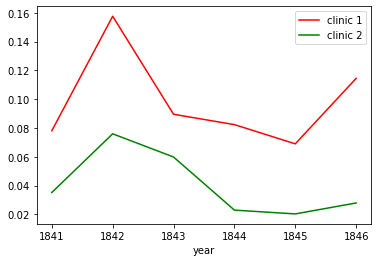

In [55]:
ax = clinic_1.plot(x='year',y='mortality',label='clinic 1',color='red')
clinic_2.plot(x='year',y='mortality',label='clinic 2',color='green',ax=ax)
plt.show()

In [56]:
monthly_df = pd.read_csv('monthly_deaths.csv')
monthly_df.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [57]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [58]:
#mortality

monthly_df['mortality'] = monthly_df.deaths/ monthly_df.births
monthly_df.head()

,date,births,deaths,mortality
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


In [60]:
#Format

monthly_df.date = pd.to_datetime(monthly_df['date'])

In [61]:
#Split

start_washing = pd.to_datetime('1847-06-01')

before_washing = monthly_df[monthly_df['date']<start_washing]
after_washing = monthly_df[monthly_df['date']>=start_washing]

# Before Handwashing

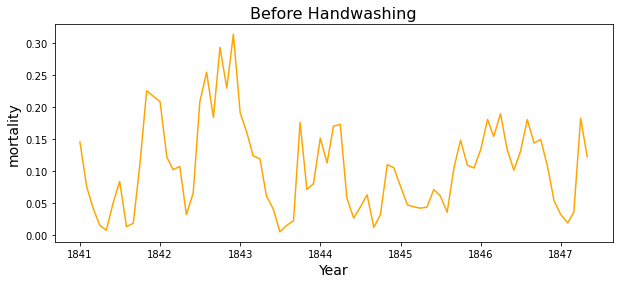

In [67]:
fig, ax = plt.subplots(figsize=(10,4))
x= before_washing['date']
y= before_washing['mortality']
plt.plot(x,y,color='orange')
plt.title('Before Handwashing',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('mortality',fontsize=14)
plt.show()

# After Handwashing

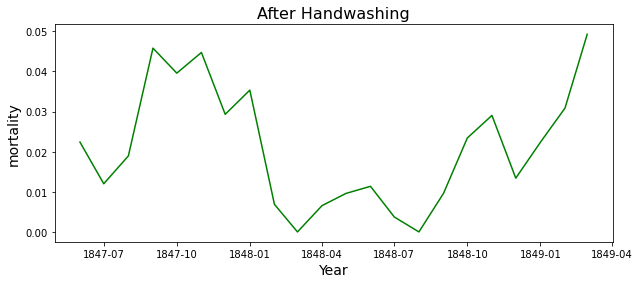

In [68]:
fig, ax = plt.subplots(figsize=(10,4))
x= after_washing['date']
y= after_washing['mortality']
plt.plot(x,y,color='green')
plt.title('After Handwashing',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('mortality',fontsize=14)
plt.show()

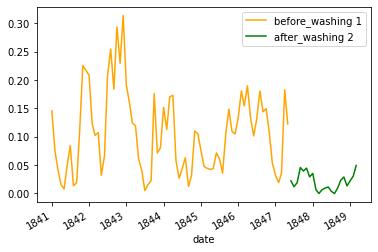

In [69]:
ax = before_washing.plot(x='date',y='mortality',label='before_washing 1',color='orange')
after_washing.plot(x='date',y='mortality',label='after_washing 2',color='green',ax=ax)
plt.show()

In [72]:
#average befor handwashing

average_befor_handwashing =before_washing.mortality.mean()
average_befor_handwashing

0.10504998260908793

In [73]:
#average after handwashing

average_after_handwashing =after_washing.mortality.mean()
average_after_handwashing

0.021093375097254535

In [74]:
#difference between after and befor

difference_between_after_and_befor=average_after_handwashing-average_befor_handwashing
difference_between_after_and_befor

-0.0839566075118334

the minus sign indicate that there is a decrease. so handwashing decreased the mortality 